In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [3]:
from sklearn.datasets import load_digits

In [4]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

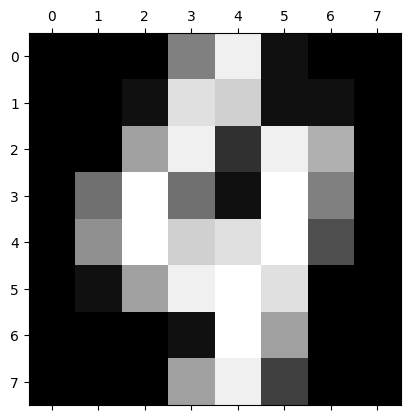

In [5]:
plt.gray()
plt.matshow(digits.images[14])

In [6]:
len(digits.data)

1797

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=400)


In [9]:
model.fit(X_train,Y_train)


LogisticRegression(max_iter=400)

In [10]:
model.score(X_test,Y_test)

0.9694444444444444

In [22]:
model.predict(digits.data[11:15])

array([1, 2, 3, 4])

In [26]:
y_predicted = model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
cm

array([[37,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 34,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  0, 30,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 37,  0,  1],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 42]])

In [29]:
import seaborn as sn


Text(95.72222222222221, 0.5, 'Truth')

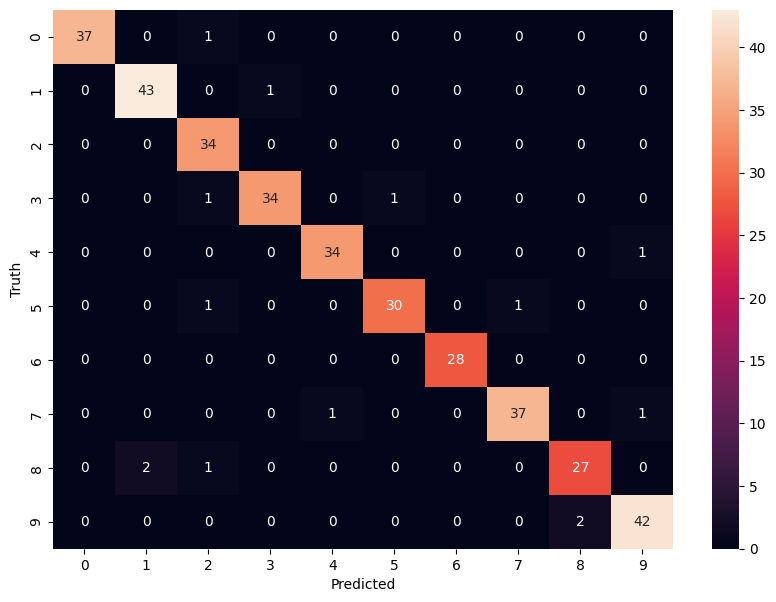

In [50]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



In [64]:
svm=SVC()
svm.fit(X_train,Y_train)
svm.score(X_test,Y_test)


0.9861111111111112

In [65]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)


0.9777777777777777

In [80]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [69]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [70]:
def get_score(model, X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

In [78]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10)


In [82]:
scores_l=[]
scores_svm=[]
scores_rf=[]
for train_index,test_index in kf.split(digits.data):
    X_train,X_test,Y_train,Y_test= digits.data[train_index],digits.data[test_index],digits.target[train_index],digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(max_iter=400),X_train,X_test,Y_train,Y_test))
    scores_svm.append(get_score(SVC(),X_train,X_test,Y_train,Y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=30),X_train,X_test,Y_train,Y_test))
print(scores_l)
print(scores_svm)
print(scores_rf)



[0.9055555555555556, 0.9722222222222222, 0.8833333333333333, 0.9555555555555556, 0.9444444444444444, 0.9555555555555556, 0.95, 0.9329608938547486, 0.88268156424581, 0.9273743016759777]
[0.9444444444444444, 1.0, 0.9333333333333333, 0.9833333333333333, 0.9833333333333333, 0.9888888888888889, 0.9888888888888889, 0.994413407821229, 0.9664804469273743, 0.9497206703910615]
[0.8888888888888888, 0.9722222222222222, 0.9388888888888889, 0.9388888888888889, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9497206703910615, 0.9217877094972067, 0.9441340782122905]


In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
cross_val_score(LogisticRegression(),digits.data,digits.target)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

from sklearn.datasets import load_iris
iris=load_iris()

In [52]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [53]:
Xitrain,Xitest,Yitrain,Yitest=train_test_split(iris.data,iris.target,test_size=0.2)


In [54]:
iris_model=LogisticRegression()


In [55]:
iris_model.fit(Xitrain,Yitrain)

LogisticRegression()

In [56]:
Yipred=iris_model.predict(Xitest)

Text(95.72222222222221, 0.5, 'Truth')

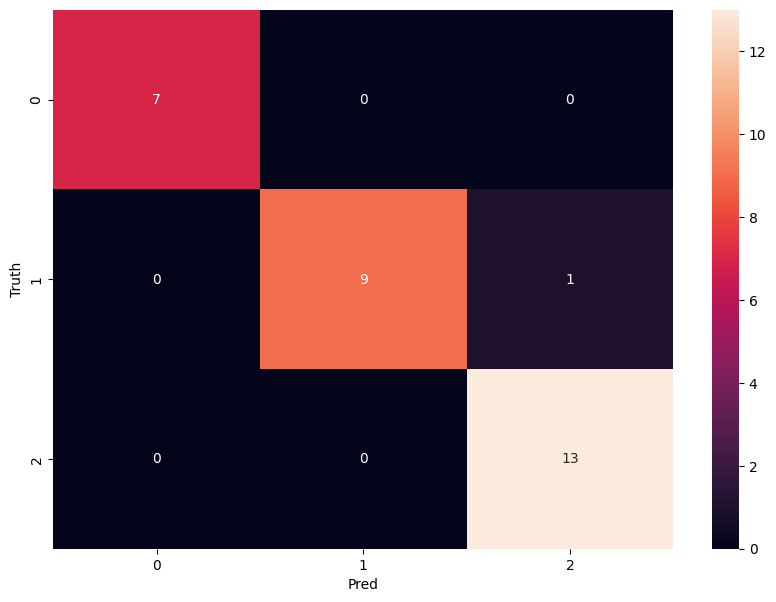

In [57]:
cm_iris=confusion_matrix(Yitest,Yipred)
plt.figure(figsize=(10,7))
sn.heatmap(cm_iris,annot=True)
plt.xlabel('Pred')
plt.ylabel('Truth')


In [58]:
iris_model.score(Xitest,Yitest)

0.9666666666666667

In [59]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])